In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import normalize, minmax_scale
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#importing the dataset
train=pd.read_csv('data/KDDTrain+.txt')
train.head(10)






,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.0,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
#importing the dataset
test=pd.read_csv('data/KDDTest+.txt')
test.head(10)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


In [7]:
# #removing the last column
train=train.iloc[:,0:42]

#naming the attributes
train.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                        ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                      'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                       'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [8]:
# #removing the last column
test=test.iloc[:,0:42]

#naming the attributes
test.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                        ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                      'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                       'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [9]:
train['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
train['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
train['service'].replace({ 'other':0,'private':1,'http':2,'remote_job':3,'ftp_data':4,'name':5,'netbios_ns':6,'eco_i':7,'mtp':8,
    'telnet':9,'finger':10,'domain_u':11,'supdup':12, 'uucp_path':13,'Z39_50':14,'smtp':15,'csnet_ns':16,'uucp':17,'netbios_dgm':18,'urp_i':19,
    'auth':20,'domain':21,'ftp':22,'bgp':23,'ldap':24,'ecr_i':25,'gopher':26, 'vmnet':27,'systat':28,'http_443':29,
    'efs':30,'whois':31,'imap4':32,'iso_tsap':33,'echo':34,'klogin':35,'link':36,'sunrpc':37,'login':38,'kshell':39,
    'sql_net':40,'time':41,'hostnames':42,'exec':43,'ntp_u':44,'discard':45,'nntp':46,'courier':47,'ctf':48,'ssh':49,
    'daytime':50,'shell':51,'netstat':52,'pop_3':53,'nnsp':54,'IRC':55,'pop_2':56,'printer':57,'tim_i':58,'pm_dump':59,'red_i':60,
    'netbios_ssn':61,'rje':62,'X11':63,'urh_i':64,'http_8001':65,'aol':66,'http_2784':67,'tftp_u':68,'harvest':69},inplace = True)

In [10]:
test['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
test['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
test['service'].replace({ 'other':0,'private':1,'http':2,'remote_job':3,'ftp_data':4,'name':5,'netbios_ns':6,'eco_i':7,'mtp':8,
    'telnet':9,'finger':10,'domain_u':11,'supdup':12, 'uucp_path':13,'Z39_50':14,'smtp':15,'csnet_ns':16,'uucp':17,'netbios_dgm':18,'urp_i':19,
    'auth':20,'domain':21,'ftp':22,'bgp':23,'ldap':24,'ecr_i':25,'gopher':26, 'vmnet':27,'systat':28,'http_443':29,
    'efs':30,'whois':31,'imap4':32,'iso_tsap':33,'echo':34,'klogin':35,'link':36,'sunrpc':37,'login':38,'kshell':39,
    'sql_net':40,'time':41,'hostnames':42,'exec':43,'ntp_u':44,'discard':45,'nntp':46,'courier':47,'ctf':48,'ssh':49,
    'daytime':50,'shell':51,'netstat':52,'pop_3':53,'nnsp':54,'IRC':55,'pop_2':56,'printer':57,'tim_i':58,'pm_dump':59,'red_i':60,
    'netbios_ssn':61,'rje':62,'X11':63,'urh_i':64,'http_8001':65,'aol':66,'http_2784':67,'tftp_u':68,'harvest':69},inplace = True)

In [11]:
# train['label'].replace({ 'teardrop':1, 'back':1, 'smurf':1, 'udpstorm':1, 'apache2':1, 'pod':1, 'land':1, 'mailbomb':1, 'processtable':1, 'nmap':1,                                           
#   'phf':0, 'xsnoop':0, 'worm':0, 'satan':0, 'buffer_overflow':0, 'named':0, 'perl':0, 'saint':0, 'guess_passwd':0,
# 'ipsweep':0, 'multihop':0, 'imap':0, 'mscan':0, 'loadmodule':0, 'ftp_write':0, 'rootkit':0, 'snmpguess':0, 'sendmail':0, 'warezmaster':0,
#     'normal':0, 'portsweep':0, 'snmpgetattack':0, 'sqlattack':0, 'httptunnel':0, 'ps':0, 'spy':0, 'xterm':0, 'warezclient':0,
#       'neptune':1  },inplace = True)

train['label'].replace({ 
'sendmail':0, 'mailbomb':0, 'imap':0, 'neptune':1, 'rootkit':0, 'back':0, 'udpstorm':1, 'phf':0, 'ftp_write':0,
'guess_passwd':0, 'pod':1, 'mscan':0, 'land':1, 'teardrop':1, 'sqlattack':0, 'named':0, 'warezmaster':0, 'multihop':0, 'loadmodule':0, 
'ps':0, 'warezclient':0, 'worm':0, 'snmpgetattack':0, 'httptunnel':0, 'portsweep':0, 'normal':0, 'perl':0, 'buffer_overflow':0, 'xlock':0, 
'ipsweep':0, 'apache2':1, 'processtable':0, 'xterm':0, 'spy':0, 'snmpguess':0, 'nmap':0, 'smurf':1, 'saint':1, 'xsnoop':0, 'satan':0
  },inplace = True)


test['label'].replace({ 
'sendmail':0, 'mailbomb':0, 'imap':0, 'neptune':1, 'rootkit':0, 'back':0, 'udpstorm':1, 'phf':0, 'ftp_write':0,
'guess_passwd':0, 'pod':1, 'mscan':0, 'land':1, 'teardrop':1, 'sqlattack':0, 'named':0, 'warezmaster':0, 'multihop':0, 'loadmodule':0, 
'ps':0, 'warezclient':0, 'worm':0, 'snmpgetattack':0, 'httptunnel':0, 'portsweep':0, 'normal':0, 'perl':0, 'buffer_overflow':0, 'xlock':0, 
'ipsweep':0, 'apache2':1, 'processtable':0, 'xterm':0, 'spy':0, 'snmpguess':0, 'nmap':0, 'smurf':1, 'saint':1, 'xsnoop':0, 'satan':0
  },inplace = True)
train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,1,2,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,1,2,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
5,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.00,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
6,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.00,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,1,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.00,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.00,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.00,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1


In [12]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train['label'] == 0]
df_minority = train[train['label'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
train = df_upsampled

# Display new class counts
train['label'].value_counts()


label
0    81001
1    81001
Name: count, dtype: int64

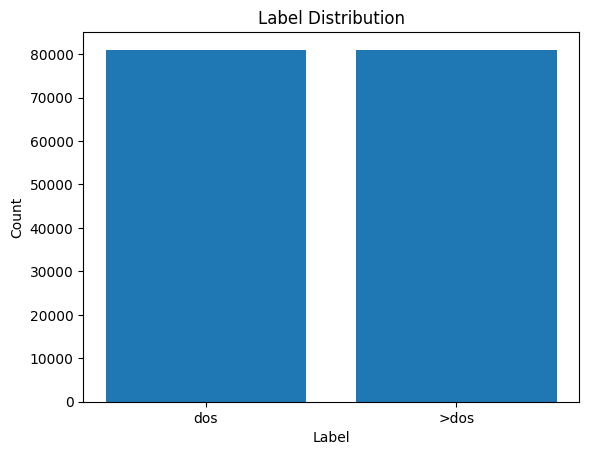

In [13]:
import matplotlib.pyplot as plt

# count the number of each label value in the balanced dataset
label_counts = train['label'].value_counts()

# plot a bar chart to show the label count
plt.bar(label_counts.index, label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['dos', '>dos'])
plt.show()




In [14]:
#balancing the test dataset
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = test[test['label'] == 0]
df_minority = test[test['label'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
test = df_upsampled

# Display new class counts
test['label'].value_counts()

label
0    16104
1    16104
Name: count, dtype: int64

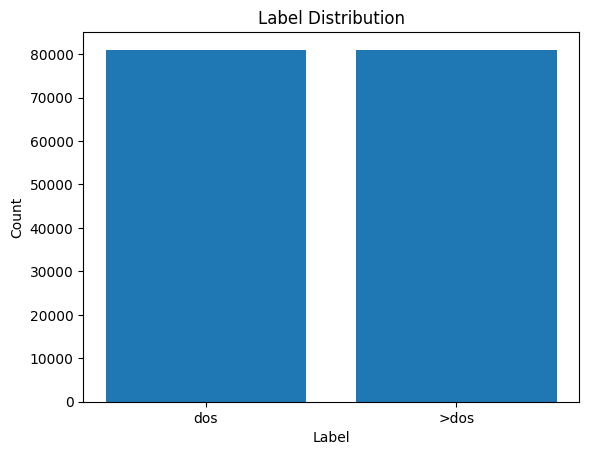

In [15]:
#balancing the test dataset
import matplotlib.pyplot as plt

# count the number of each label value in the balanced dataset
label_counts = train['label'].value_counts()

# plot a bar chart to show the label count
plt.bar(label_counts.index, label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['dos', '>dos'])
plt.show()


In [16]:
y_train = train.iloc[:, -1]  # select the last column (label) as y_train
x_train = train.iloc[:, :-1]  # select all columns except the last one as x_train

y_test = test.iloc[:, -1]  # select the last column (label) as y_test
x_test = test.iloc[:, :-1]  # select all columns except the last one as x_test

print(x_train.shape)
print(y_train.shape)

print(x_train.head())
print(y_train.head())




(162002, 41)
(162002,)
    duration  protocol_type  service  flag  src_bytes  dst_bytes  land   
0          0              0        0     9        146          0     0  \
2          0              1        2     9        232       8153     0   
3          0              1        2     9        199        420     0   
11         0              1        2     9        287       2251     0   
12         0              1        4     9        334          0     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in   
0                0       0    0                  0          0  \
2                0       0    0                  0          1   
3                0       0    0                  0          1   
11               0       0    0                  0          1   
12               0       0    0                  0          1   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations   
0                 0           0             0         0       

In [34]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
train=pd.DataFrame(scaler.fit_transform(train),
            columns=train.columns, index=train.index) 

test=pd.DataFrame(scaler.transform(test),
            columns=test.columns, index=test.index) 

y_train = train.iloc[:, -1]  # select the last column (label) as y_train
x_train = train.iloc[:, :-1]  # select all columns except the last one as x_train

y_test = test.iloc[:, -1]  # select the last column (label) as y_test
x_test = test.iloc[:, :-1]  # select all columns except the last one as x_test
    

x_train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.0,0.000000,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.025440,0.001957,0.0,0.00,0.00,0.00,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.000000,0.5,0.028986,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.009785,0.009785,0.2,0.20,0.00,0.00,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0.000000,0.5,0.028986,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058708,0.062622,0.0,0.00,0.00,0.00,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11,0.000000,0.5,0.028986,0.9,2.079765e-07,1.718403e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005871,0.013699,0.0,0.00,0.00,0.00,1.00,0.00,0.43,0.031373,0.858824,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00
12,0.000000,0.5,0.057971,0.9,2.420353e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003914,0.003914,0.0,0.00,0.00,0.00,1.00,0.00,0.00,0.007843,0.078431,1.00,0.00,1.00,0.20,0.00,0.00,0.00,0.00
15,0.000000,0.5,0.028986,0.9,2.173970e-07,1.052569e-05,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.015656,0.017613,0.0,0.11,0.00,0.00,1.00,0.00,0.22,0.356863,1.000000,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00
16,0.000000,1.0,0.101449,0.9,1.304382e-08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001957,0.001957,0.0,0.00,0.00,0.00,1.00,0.00,0.00,0.003922,0.062745,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
17,0.000000,0.5,0.028986,0.9,1.688450e-07,4.702515e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005871,0.005871,0.0,0.00,0.00,0.00,1.00,0.00,0.00,0.258824,1.000000,1.00,0.00,0.02,0.03,0.00,0.00,0.02,0.00
18,0.000000,0.5,0.028986,0.9,2.485572e-07,8.992796e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017613,0.019569,0.0,0.00,0.00,0.00,1.00,0.00,0.20,0.615686,1.000000,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00
21,0.000000,0.5,0.028986,0.9,1.833381e-07,9.088221e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.015656,0.019569,0.0,0.00,0.00,0.00,1.00,0.00,0.20,0.341176,1.000000,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00


# RFEClassifier feature selection+DecisionTree

In [33]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from joblib import dump

# Create an instance of the estimator (DecisionTreeClassifier)
estimator = DecisionTreeClassifier()

# Create an instance of the feature selector (RFE)
selector = RFE(estimator)  # Select features

# Fit the selector to the training data
selector.fit(x_train, y_train)

# Transform the training and testing data using the selected features
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)


# Train the model on the selected features
model = DecisionTreeClassifier()
model.fit(x_train_selected, y_train)

# Evaluate the model
y_pred = model.predict(x_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the trained model and feature selector
dump(model, 'MyModal.joblib')
dump(selector, 'MyFeatureSelection.joblib')



Accuracy: 0.9264468455042225


['MyFeatureSelection.joblib']